# <center> Data Simulation 
# <center> Bi-Allelic Wright-Fisher with Mutation and Selection

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from utils import set_plots_size_params

In [2]:
def wf_with_selection_and_mutation(wt_freq, population_size, fitness, mutation_rate):
    # math from https://academic.oup.com/sysbio/article/66/1/e30/2670014#syw056M2 
    eff_pop = 2 * population_size
    wt_freq = min(wt_freq * fitness, 1)                                                # selection
    wt_freq = (np.random.binomial(eff_pop, wt_freq) / eff_pop)                         # drift
    mutation_binomial_probability = wt_freq - 2*wt_freq*mutation_rate + mutation_rate  
    wt_freq = np.random.binomial(eff_pop, mutation_binomial_probability) / eff_pop     # mutation                                      # mutation
    return wt_freq
    
    
def wt_generations(generations_number, wt_freq, population_size, fitness, mutation_rate, color, label):
    freqs = [wt_freq]
    for i in range(generations_number):
        wt_freq = wf_with_selection_and_mutation(wt_freq, population_size, fitness, mutation_rate)
        freqs.append(wt_freq)
    plt.plot(range(generations_number+1), freqs, color=color, label=label, alpha=0.1)
    return freqs


def simulate_100(generations_number, wt_freq, population_size, fitness, mutation_rate, color=None, label=None):
    plt.xlabel('Generation')
    plt.ylabel('WT Frequency')
    data = []
    for i in range(100):
        wt_generations(generations_number, wt_freq, population_size, fitness, mutation_rate, 
                       color=color, label=label if i==0 else None)
    if label:
        leg = plt.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)


In [3]:
set_plots_size_params(20)

# Bigger population size -->  less stochastic data:

Text(0.5, 1.0, 'mutation rate = 0, fitness = 1')

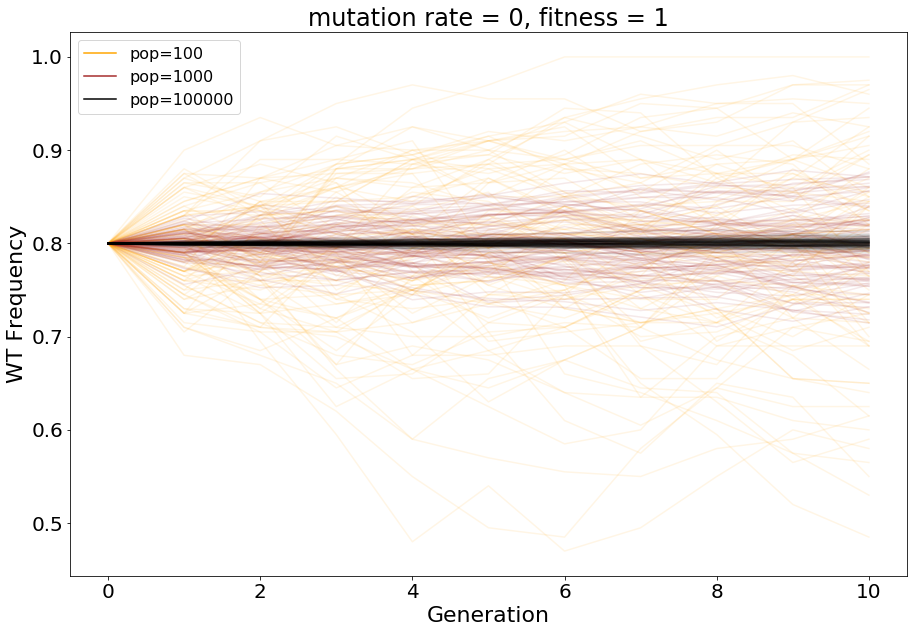

In [4]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0.8, population_size=100, 
             fitness=1, mutation_rate=0, color='orange', label='pop=100')
simulate_100(generations_number=10, wt_freq=0.8, population_size=1000, 
             fitness=1, mutation_rate=0, color='brown', label='pop=1000')
simulate_100(generations_number=10, wt_freq=0.8, population_size=100000, 
             fitness=1, mutation_rate=0, color='black', label='pop=100000')
plt.title("mutation rate = 0, fitness = 1")

# Higher fitness --> higher equalibrium frequency and faster convergence: 

Text(0.5, 1.0, 'mutation rate = 0')

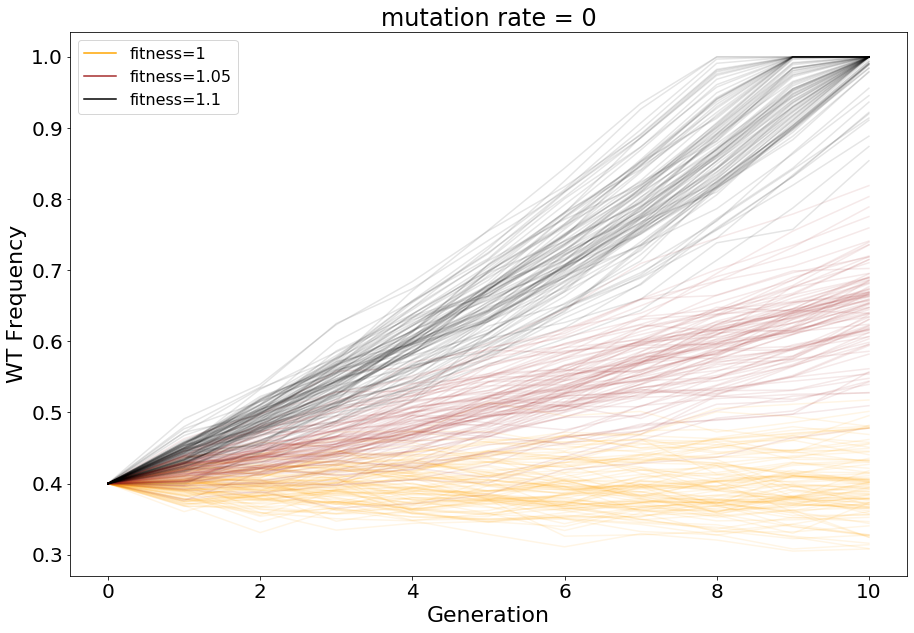

In [5]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0.4, population_size=1000, 
             fitness=1, mutation_rate=0, color='orange', label='fitness=1')
simulate_100(generations_number=10, wt_freq=0.4, population_size=1000, 
             fitness=1.05, mutation_rate=0, color='brown', label='fitness=1.05')
simulate_100(generations_number=10, wt_freq=0.4, population_size=1000, 
             fitness=1.1, mutation_rate=0, color='black', label='fitness=1.1')
plt.title("mutation rate = 0")

# Higher mutation rate --> converges faster to random and with a narrower distribution

Text(0.5, 1.0, 'fitness = 1')

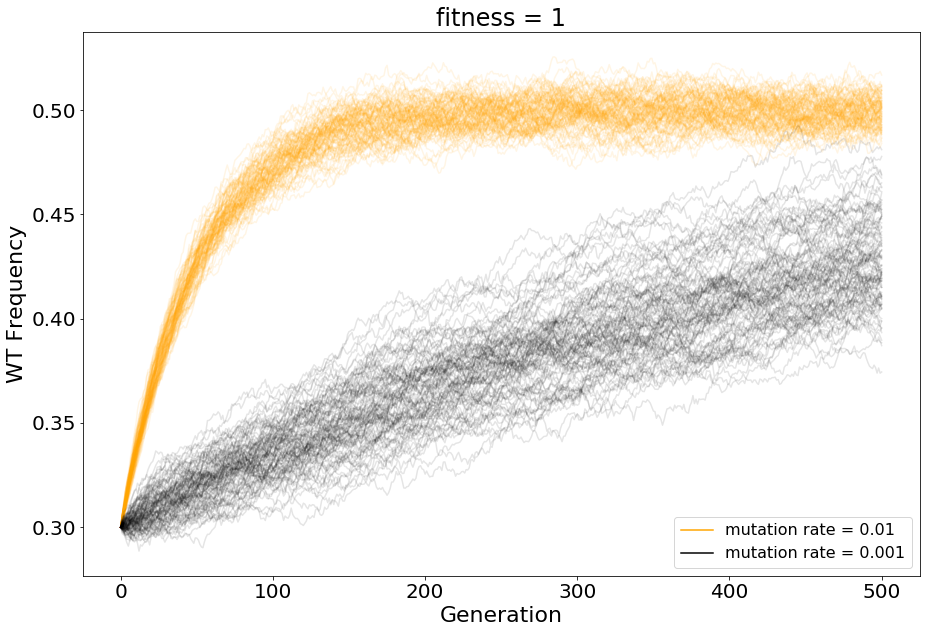

In [6]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=500, wt_freq=0.3, population_size=100000, 
             fitness=1, mutation_rate=0.01, color='orange', label="mutation rate = 0.01")
simulate_100(generations_number=500, wt_freq=0.3, population_size=100000, 
             fitness=1, mutation_rate=0.001, color='black', label="mutation rate = 0.001")
plt.title("fitness = 1")

# For a deadly mutation, the equalibirium is the mutation rate:

Text(0.5, 1.0, 'fitness = 0')

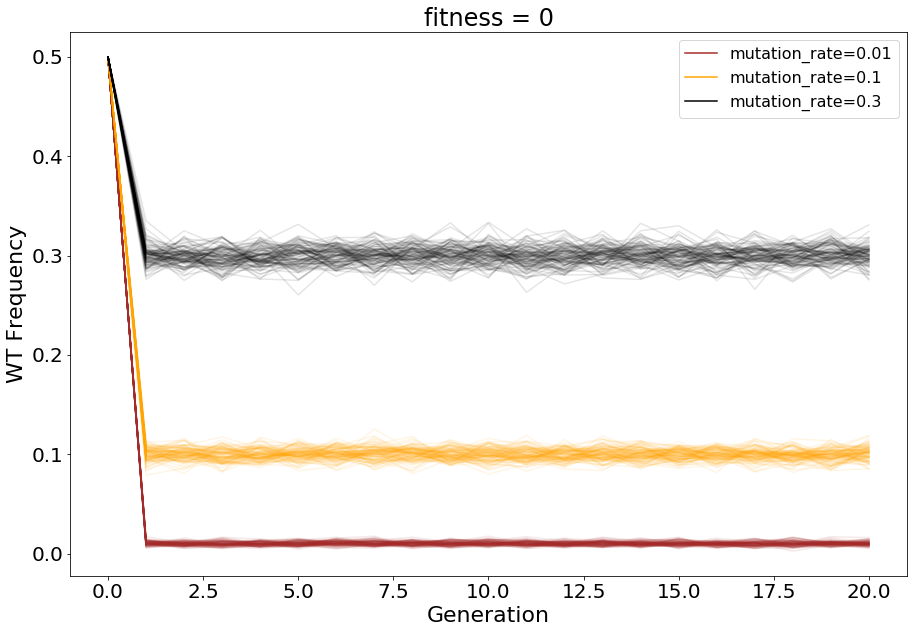

In [7]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=20, wt_freq=0.5, population_size=1000, 
             fitness=0, mutation_rate=0.01, color='brown', label='mutation_rate=0.01')
simulate_100(generations_number=20, wt_freq=0.5, population_size=1000, 
             fitness=0, mutation_rate=0.1, color='orange', label='mutation_rate=0.1')
simulate_100(generations_number=20, wt_freq=0.5, population_size=1000, 
             fitness=0, mutation_rate=0.3, color='black', label='mutation_rate=0.3')
plt.title('fitness = 0')

# Fitness and mutation rate interact and set the equalibrium frequency:

Text(0.5, 1.0, 'fitness = 1.05')

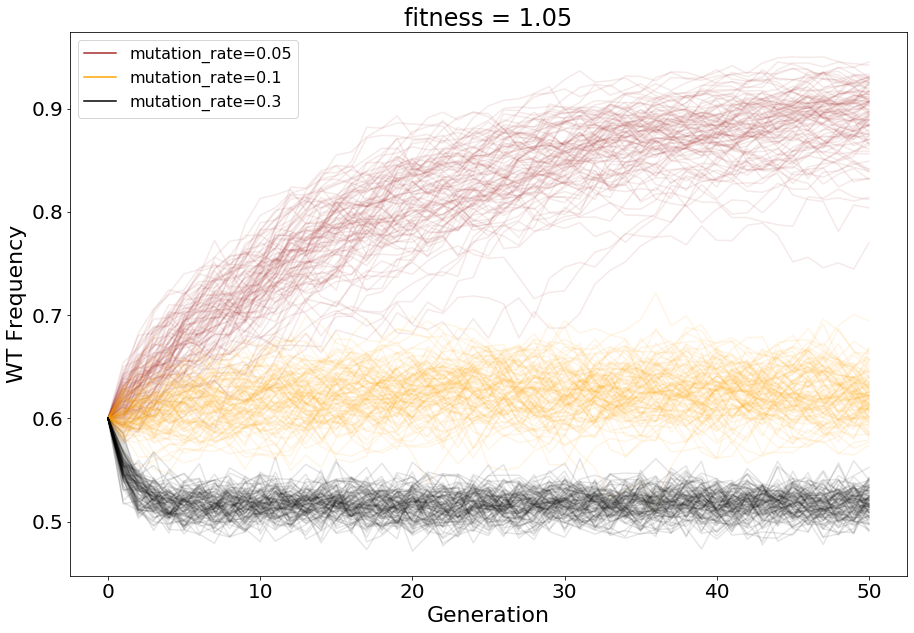

In [8]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=50, wt_freq=0.6, population_size=1000, 
             fitness=1.05, mutation_rate=0.05, color='brown', label='mutation_rate=0.05')
simulate_100(generations_number=50, wt_freq=0.6, population_size=1000, 
             fitness=1.05, mutation_rate=0.1, color='orange', label='mutation_rate=0.1')
simulate_100(generations_number=50, wt_freq=0.6, population_size=1000, 
             fitness=1.05, mutation_rate=0.3, color='black', label='mutation_rate=0.3')
plt.title("fitness = 1.05")

# So, to tell between a 10^-3 and a 10^-4 mutation rate over 10 generations we would need a population size of ~ 50K:

Text(0.5, 1.0, 'fitness = 1, population size = 50K')

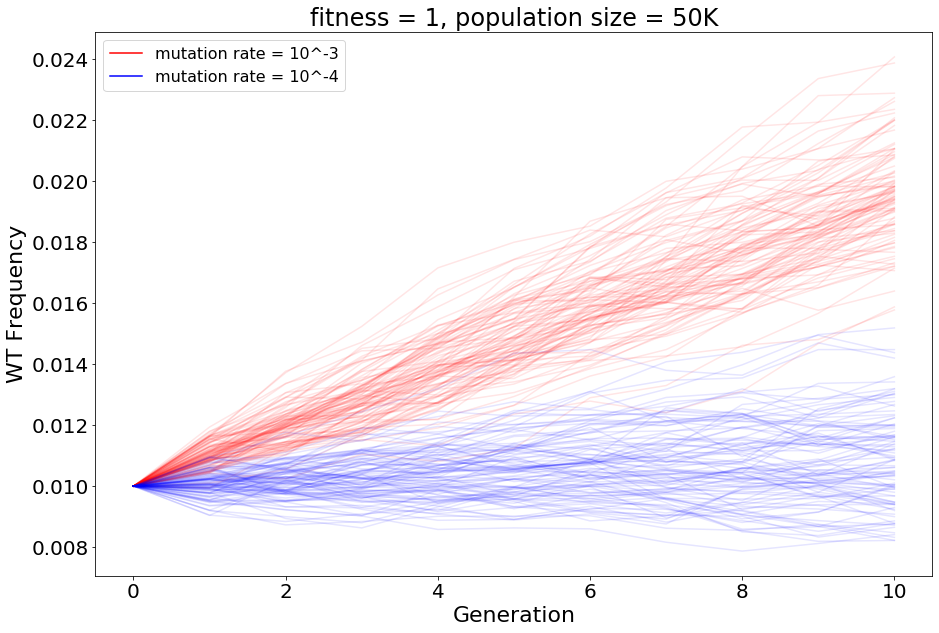

In [9]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0.01, population_size=50000, 
             fitness=1, mutation_rate=0.001, color='red', label="mutation rate = 10^-3")
simulate_100(generations_number=10, wt_freq=0.01, population_size=50000, 
             fitness=1, mutation_rate=0.0001, color='blue', label="mutation rate = 10^-4")
plt.title("fitness = 1, population size = 50K")

Text(0.5, 1.0, 'fitness = 1, population size = 10K => hard to tell them apart..!')

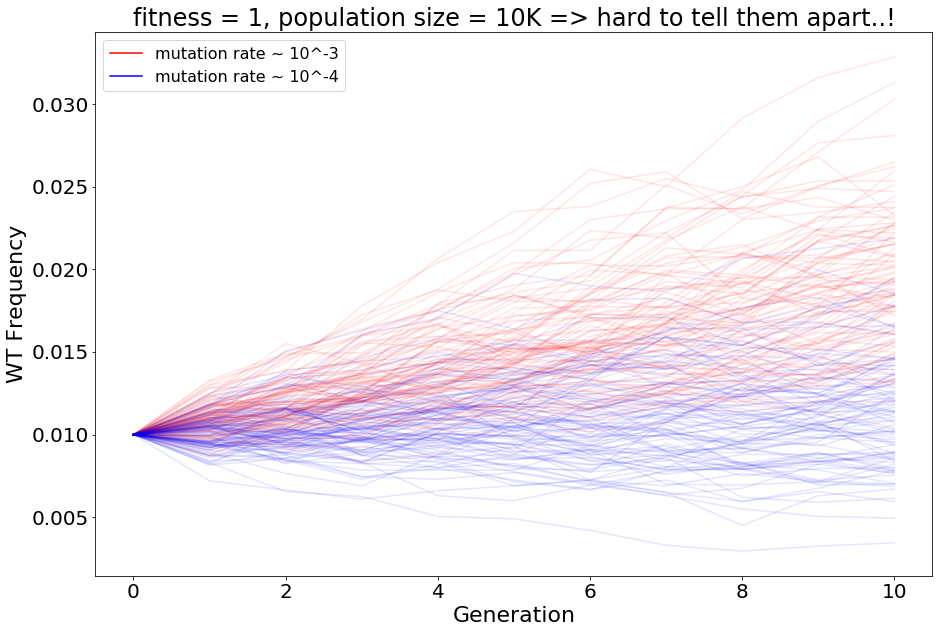

In [10]:
plt.figure(figsize=(15,10))
simulate_100(generations_number=10, wt_freq=0.01, population_size=10000, 
             fitness=1, mutation_rate=0.001, color='red', label="mutation rate ~ 10^-3")
simulate_100(generations_number=10, wt_freq=0.01, population_size=10000, 
             fitness=1, mutation_rate=0.0001, color='blue', label="mutation rate ~ 10^-4")
plt.title("fitness = 1, population size = 10K => hard to tell them apart..!")